<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/cc-logo-square.png" width="200" alt="cognitiveclass.ai logo" />

<h1>Logistic Regression</h1>

<h2>Table of Contents</h2>
<p>In this lab, we will cover logistic regression using PyTorch.</p>

<ul>
    <li><a href="#Log">Logistic Function</a></li>
    <li><a href="#Seq">Build a Logistic Regression Using nn.Sequential</a></li>
    <li><a href="#Model">Build Custom Modules</a></li>
</ul>
<p>Estimated Time Needed: <strong>15 min</strong></p>

<hr>

<h2>Preparation</h2>

We'll need the following libraries:  

In [1]:
# Import the libraries we need for this lab

import torch.nn as nn
import torch
import matplotlib.pyplot as plt 

Set the random seed:

In [2]:
# Set the random seed

torch.manual_seed(2)

<!--Empty Space for separating topics-->

<h2 id="Log">Logistic Function</h2>

Create a tensor ranging from -100 to 100:

In [3]:
z = torch.arange(-100, 100, 0.1).view(-1, 1)
print("The tensor: ", z)

The tensor:  tensor([[-100.0000],
        [ -99.9000],
        [ -99.8000],
        ...,
        [  99.7000],
        [  99.8000],
        [  99.9000]])


Create a sigmoid object: 

In [4]:
# Create sigmoid object

sig = nn.Sigmoid()

Apply the element-wise function Sigmoid with the object:

In [5]:
# Use sigmoid object to calculate the 

yhat = sig(z)

Plot the results: 

Text(0,0.5,'yhat')

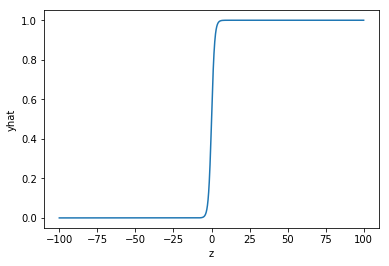

In [6]:
plt.plot(z.numpy(), yhat.numpy())
plt.xlabel('z')
plt.ylabel('yhat')

Apply the element-wise Sigmoid from the function module and plot the results:

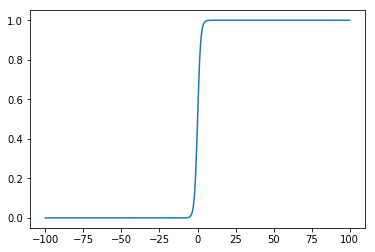

In [7]:
yhat = torch.sigmoid(z)
plt.plot(z.numpy(), yhat.numpy())

<!--Empty Space for separating topics-->

<h2 id="Seq">Build a Logistic Regression with <code>nn.Sequential</code></h2>

Create a 1x1 tensor where x represents one data sample with one dimension, and 2x1 tensor X represents two data samples of one dimension:

In [8]:
# Create x and X tensor

x = torch.tensor([[1.0]])
X = torch.tensor([[1.0], [100]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1.]])
X =  tensor([[  1.],
        [100.]])


Create a logistic regression object with the <code>nn.Sequential</code> model with a one-dimensional input:

In [9]:
# Use sequential function to create model

model = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())

The object is represented in the following diagram: 

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.1.1_logistic_regression_block_diagram.png" width = 800, align = "center" alt="logistic regression block diagram" />

In this case, the parameters are randomly initialized. You can view them the following ways:

In [10]:
# Print the parameters

print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict())

list(model.parameters()):
  [Parameter containing:
tensor([[0.2294]], requires_grad=True), Parameter containing:
tensor([-0.2380], requires_grad=True)]

model.state_dict():
  OrderedDict([('0.weight', tensor([[0.2294]])), ('0.bias', tensor([-0.2380]))])


Make a prediction with one sample:

In [11]:
# The prediction for x

yhat = model(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.4979]], grad_fn=<SigmoidBackward>)


Calling the object with tensor <code>X</code> performed the following operation <b>(code values may not be the same as the diagrams value  depending on the version of PyTorch) </b>:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.1.1_logistic_functio_example%20.png" width="400" alt="Logistic Example" />

Make a prediction with multiple samples:

In [12]:
# The prediction for X

yhat = model(X)
yhat

tensor([[0.4979],
        [1.0000]], grad_fn=<SigmoidBackward>)

Calling the object performed the following operation: 

Create a 1x2 tensor where x represents one data sample with one dimension, and 2x3 tensor X represents one data sample of two dimensions:

In [13]:
# Create and print samples

x = torch.tensor([[1.0, 1.0]])
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1., 1.]])
X =  tensor([[1., 1.],
        [1., 2.],
        [1., 3.]])


Create a logistic regression object with the <code>nn.Sequential</code> model with a two-dimensional input: 

In [14]:
# Create new model using nn.sequential()

model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())

The object will apply the Sigmoid function to the output of the linear function as shown in the following diagram:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.1.1logistic_output.png" width="800" alt="The structure of nn.sequential"/>

In this case, the parameters are randomly initialized. You can view them the following ways:

In [15]:
# Print the parameters

print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict())

list(model.parameters()):
  [Parameter containing:
tensor([[ 0.1939, -0.0361]], requires_grad=True), Parameter containing:
tensor([0.3021], requires_grad=True)]

model.state_dict():
  OrderedDict([('0.weight', tensor([[ 0.1939, -0.0361]])), ('0.bias', tensor([0.3021]))])


Make a prediction with one sample:

In [16]:
# Make the prediction of x

yhat = model(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.6130]], grad_fn=<SigmoidBackward>)


The operation is represented in the following diagram:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.3.1.logisticwithouptut.png" width="500" alt="Sequential Example" />

Make a prediction with multiple samples:

In [17]:
# The prediction of X

yhat = model(X)
print("The prediction: ", yhat)

The prediction:  tensor([[0.6130],
        [0.6044],
        [0.5957]], grad_fn=<SigmoidBackward>)


The operation is represented in the following diagram: 

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.1.1_logistic_with_outputs2.png" width="800" alt="Sequential Example" />

<!--Empty Space for separating topics-->

<h2 id="Model">Build Custom Modules</h2>

In this section, you will build a custom Module or class. The model or object function is identical to using <code>nn.Sequential</code>.

Create a logistic regression custom module:

In [18]:
# Create logistic_regression custom class

class logistic_regression(nn.Module):
    
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
    
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

Create a 1x1 tensor where x represents one data sample with one dimension, and 3x1 tensor where $X$ represents one data sample of one dimension:

In [19]:
# Create x and X tensor

x = torch.tensor([[1.0]])
X = torch.tensor([[-100], [0], [100.0]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1.]])
X =  tensor([[-100.],
        [   0.],
        [ 100.]])


Create a model to predict one dimension: 

In [20]:
# Create logistic regression model

model = logistic_regression(1)

In this case, the parameters are randomly initialized. You can view them the following ways:

In [21]:
# Print parameters 

print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict())

list(model.parameters()):
  [Parameter containing:
tensor([[0.2381]], requires_grad=True), Parameter containing:
tensor([-0.1149], requires_grad=True)]

model.state_dict():
  OrderedDict([('linear.weight', tensor([[0.2381]])), ('linear.bias', tensor([-0.1149]))])


Make a prediction with one sample:

In [22]:
# Make the prediction of x

yhat = model(x)
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[0.5307]], grad_fn=<SigmoidBackward>)


Make a prediction with multiple samples:

In [23]:
# Make the prediction of X

yhat = model(X)
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[4.0805e-11],
        [4.7130e-01],
        [1.0000e+00]], grad_fn=<SigmoidBackward>)


Create a logistic regression object with a function with two inputs: 

In [24]:
# Create logistic regression model

model = logistic_regression(2)

Create a 1x2 tensor where x represents one data sample with one dimension, and 3x2 tensor X represents one data sample of one dimension:

In [25]:
# Create x and X tensor

x = torch.tensor([[1.0, 2.0]])
X = torch.tensor([[100, -100], [0.0, 0.0], [-100, 100]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1., 2.]])
X =  tensor([[ 100., -100.],
        [   0.,    0.],
        [-100.,  100.]])


Make a prediction with one sample:

In [26]:
# Make the prediction of x

yhat = model(x)
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[0.2943]], grad_fn=<SigmoidBackward>)


Make a prediction with multiple samples: 

In [27]:
# Make the prediction of X

yhat = model(X)
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[7.7529e-33],
        [3.4841e-01],
        [1.0000e+00]], grad_fn=<SigmoidBackward>)


<!--Empty Space for separating topics-->

<h3>Practice</h3>

Make your own model <code>my_model</code> as applying linear regression first and then logistic regression using <code>nn.Sequential()</code>. Print out your prediction.

In [30]:
# Practice: Make your model and make the prediction

X = torch.tensor([-10.0])

my_model2= nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())
y2 = my_model2(X)

print("y2 = ", y2)

y2 =  tensor([0.4372], grad_fn=<SigmoidBackward>)


Double-click <b>here</b> for the solution.

<!-- 
my_model = nn.Sequential(nn.Linear(1, 1),nn.Sigmoid())
yhat = my_model(X)
print("The prediction: ", yhat)
-->

<!--Empty Space for separating topics-->

<a href="http://cocl.us/pytorch_link_bottom">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/notebook_bottom%20.png" width="750" alt="PyTorch Bottom" />
</a>

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.